<a href="https://colab.research.google.com/github/Jayateerthrk/AI-launch-Pad/blob/main/Day1_Assignment2_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Unsupervised Learning with the Iris Dataset using K-Means clustering

# Objective:

The objective of this assignment is to understand and apply the principles of Unsupervised learning using K-Means clustering for Iris dataset.

# Dataset:

I will use the Iris dataset, which contains information about iris flowers, including their sepal length, sepal width, petal length, and petal width, as well as their species. This dataset is taken from the sklearn.datasets module.

# Import required libraries

In [1]:
!pip install numpy pandas scikit-learn matplotlib

# Import Required libraries

In [17]:
from sklearn.datasets import load_iris

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode

# Import data set

In [4]:
data = load_iris()

# Data Exploration

Let's see which are the columns (features of data set)

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

So, we have Sepal length, Sepal width, Peta length & Petal width. All of them are in cms

Lets create Data from and explore the contents of Data set

In [6]:
iris=pd.DataFrame(data=data.data, columns=data.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Let's assugn numbers to species and map them back to human readable names

In [7]:
iris['species'] = data.target
# Mapping target to species names
iris['species'] = iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


So, as we can see, there are 150 rows of data

Explore more of the Iris data set

In [9]:
iris.info()
# Check for missing values
print("\nMissing Values:")
display(iris.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing Values:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


So there are no null values in data set. Data pre-processing might not be required.

Let's get some statisitcs of the Data set

In [10]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualise the Data set

Pair plotting the species based on dimentions

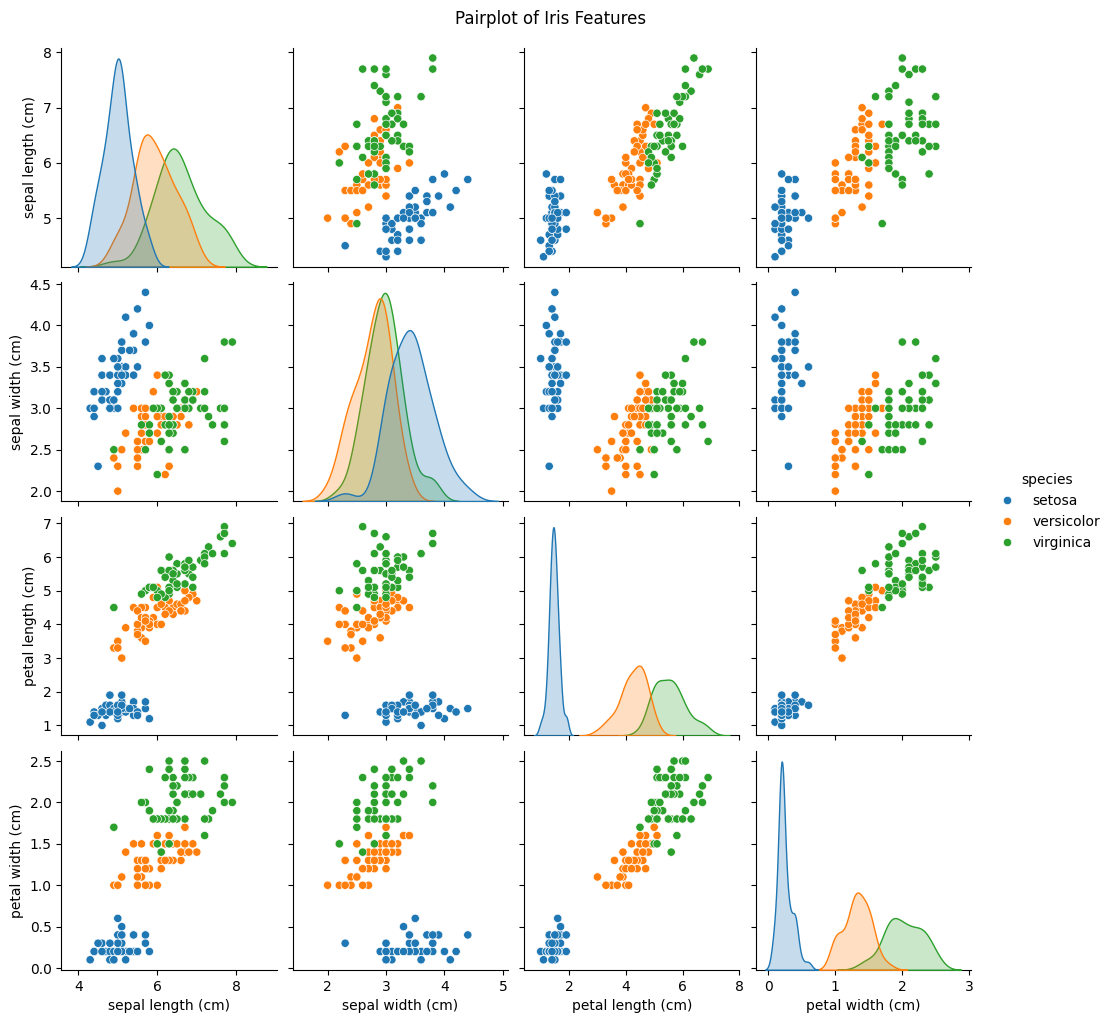

In [13]:
sns.pairplot(iris, hue='species')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

From this, we can see, each species has similar dimensions. When plotted against different combinations of lengths and widths, they can easily be classified

I will PCA (Principal Component Analysis) for dimensionality reduction

In [22]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.data)

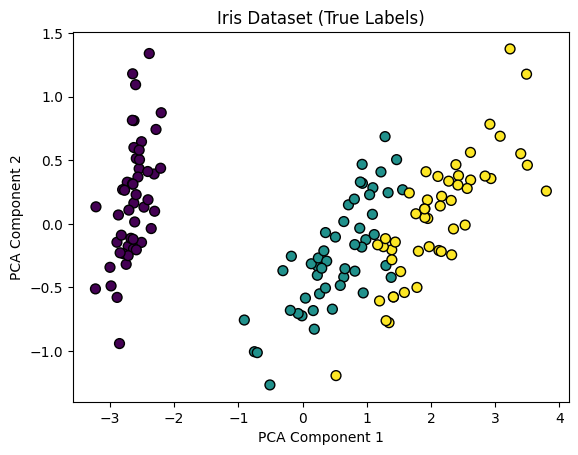

In [24]:
# Plot the data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data.target, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Iris Dataset (True Labels)')
plt.show()

As we can see, features are clustered. They can be seen as seperate clusters

# Applying K-Means Clustering for Classification

In [26]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data.data)

KMeans(n_clusters=3, random_state=42)

In [31]:
# Get the cluster labels
labels = kmeans.labels_

In [28]:
# Print the cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


# Visualise The Clusters

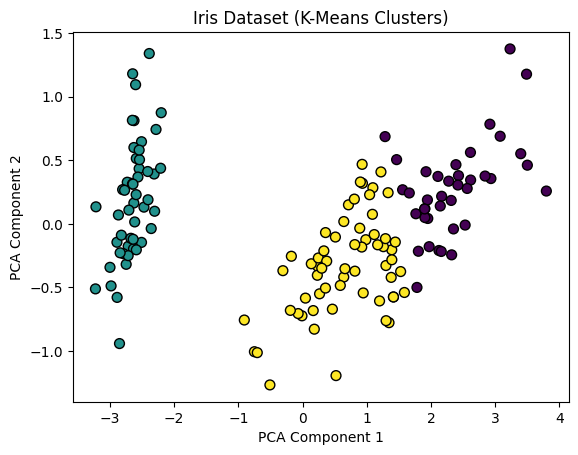

In [35]:
# Plot the clustered data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Iris Dataset (K-Means Clusters)')
plt.show()

# Evaluate Clustering

In [33]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(data.target, labels)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the accuracy (note: clustering accuracy is not a standard metric)
accuracy = np.sum(data.target == labels) / len(data.target)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]
Accuracy: 0.09333333333333334


# Conclusion/Report
Tried using K-Means Clustering for classification. Accuaracy is 0.093

# Next Steps
Try other models or fine tune the model